# EDA

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Penetracion de internet (por cada 100 habitantes)

In [72]:
df = pd.read_excel('data/raw/1_Internet_Penetracion.xlsx', sheet_name='Penetración-poblacion')
df

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.720000
1,2022,4,Capital Federal,50.350000
2,2022,4,Catamarca,16.730000
3,2022,4,Chaco,11.660000
4,2022,4,Chubut,26.230000
...,...,...,...,...
859,2014,1,Santa Cruz,8.677327
860,2014,1,Santa Fe,15.077801
861,2014,1,Santiago Del Estero,4.058899
862,2014,1,Tierra Del Fuego,19.104921


Como podemos ver, el dataframe se trata de la cantidad de personas por cada 100 habitantes con acceso a internet por provincia entre el año 2014-2022 divididos por trimestre

##### Observamos que no tenga datos nulos

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       864 non-null    int64  
 1   Trimestre                 864 non-null    int64  
 2   Provincia                 864 non-null    object 
 3   Accesos por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


##### Nos fijamos que esten todas las provincias y que no haya nada raro

In [74]:
df["Provincia" ].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

##### Convertimos a category la columna Provincia

In [75]:
df['Provincia'] = df['Provincia'].astype('category')

+ Esto se hace como una buena practica, ya que no le vamos a relizar ninguna funcion matematica a lo largo del eda y ademas ahorramos memoria

### Promedio de accesos a internet por provincia por cada 100 habitantes

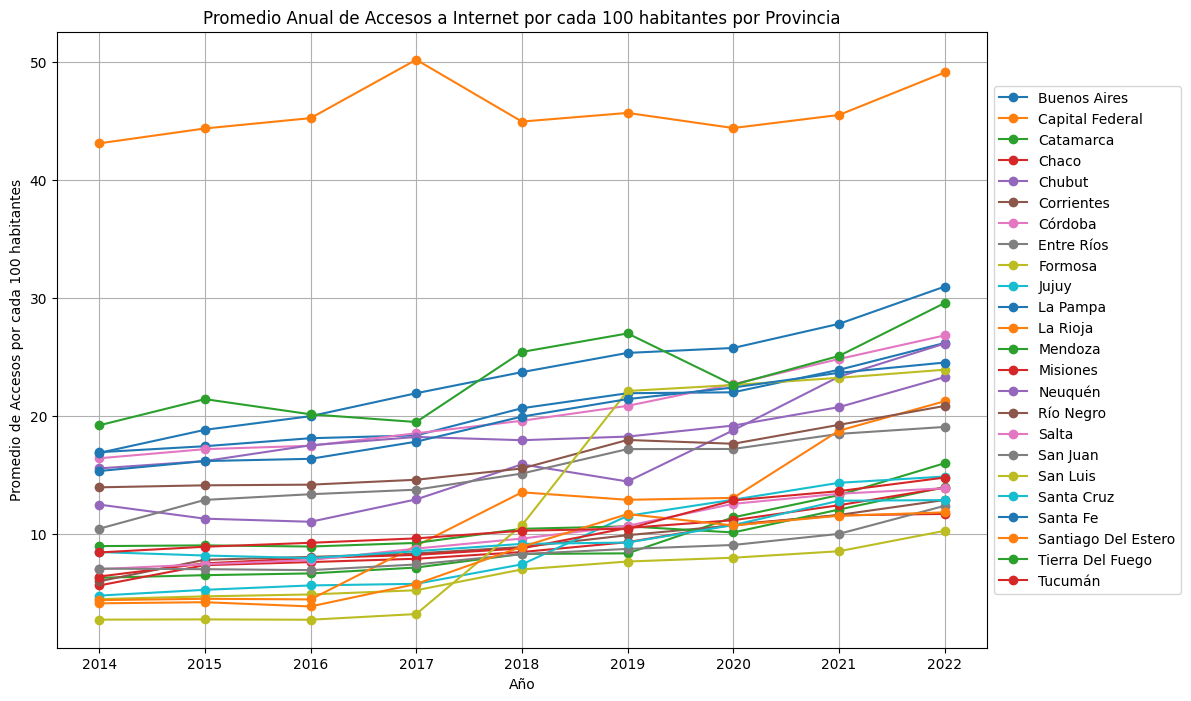

In [76]:
# Agrupamos por año y provincia, y calculamos el promedio de Accesos por cada 100 habitantes
promedios_por_provincia = df.groupby(['Año', 'Provincia'])['Accesos por cada 100 hab'].mean().unstack()

# Creamos un gráfico de líneas múltiples con una línea por provincia
plt.figure(figsize=(12, 8))
for provincia in promedios_por_provincia.columns:
    plt.plot(promedios_por_provincia.index, promedios_por_provincia[provincia], marker='o', label=provincia)

plt.xlabel('Año')

plt.ylabel('Promedio de Accesos por cada 100 habitantes')

plt.title('Promedio Anual de Accesos a Internet por cada 100 habitantes por Provincia')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

plt.show()



Este gráfico de líneas muestra la evolución del acceso a Internet en diferentes provincias a lo largo de los años. En el eje X, se presentan los años en orden cronológico, mientras que en el eje Y se refleja la cantidad de conexiones por cada 100 habitantes en las provincias.

El gráfico nos permite analizar el avance o retroceso de la conectividad en el transcurso de los años. Cada punto en la línea de una provincia representa la situación de la conectividad en un año específico. Las tendencias clave son las siguientes:

Un aumento en la línea indica un mejor acceso a Internet en esa provincia.
Una disminución en la línea puede señalar una reducción en la conectividad.
Además de evaluar la tendencia general, el gráfico proporciona una visión detallada de las variaciones a corto plazo en cada región y destaca las diferencias en el acceso a Internet entre las provincias. Estas diferencias pueden haber evolucionado con el tiempo.

Es esencial considerar que las tendencias en la conectividad están influenciadas por varios factores, como inversión en infraestructura, políticas gubernamentales y avances tecnológicos. Este gráfico es una herramienta valiosa para la toma de decisiones y la planificación de políticas destinadas a mejorar el acceso a Internet en las provincias.

## Años con MENOS de 10 habitantes con accesos a internet por cada 100 por provincia

In [77]:
# Calcular el promedio de accesos por cada 100 habitantes por provincia y año
promedio_accesos = df.groupby(['Año', 'Provincia'])['Accesos por cada 100 hab'].mean().reset_index()

# Filtrar para obtener las provincias que tienen un promedio menor de 10
provincias_menos_de_10 = promedio_accesos[promedio_accesos['Accesos por cada 100 hab'] < 10]

# Mostrar el DataFrame resultante
provincias_menos_de_10



,Año,Provincia,Accesos por cada 100 hab
2,2014,Catamarca,6.299529
3,2014,Chaco,5.649310
5,2014,Corrientes,5.999478
8,2014,Formosa,4.492856
9,2014,Jujuy,4.793449
...,...,...,...
137,2019,San Juan,8.746904
139,2019,Santa Cruz,9.287935
152,2020,Formosa,8.001975
161,2020,San Juan,9.080939


#### Observemos los outliers

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hab'>

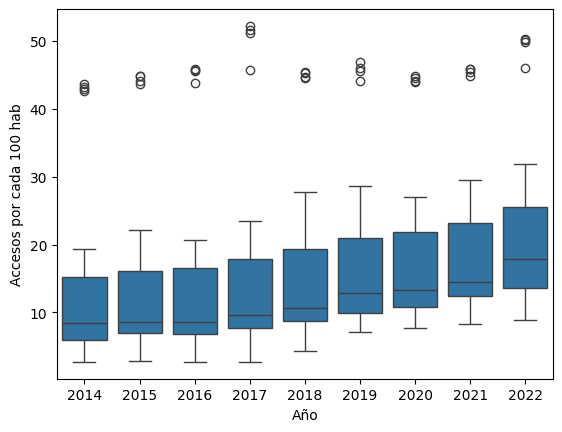

In [78]:
sns.boxplot(x='Año',y='Accesos por cada 100 hab', data = df)



Al observar este grafico y el de arriba nos podemos dar cuenta que los outliers existentes en relidad son los datos de Capital Federal, por lo que no nos preocupamos

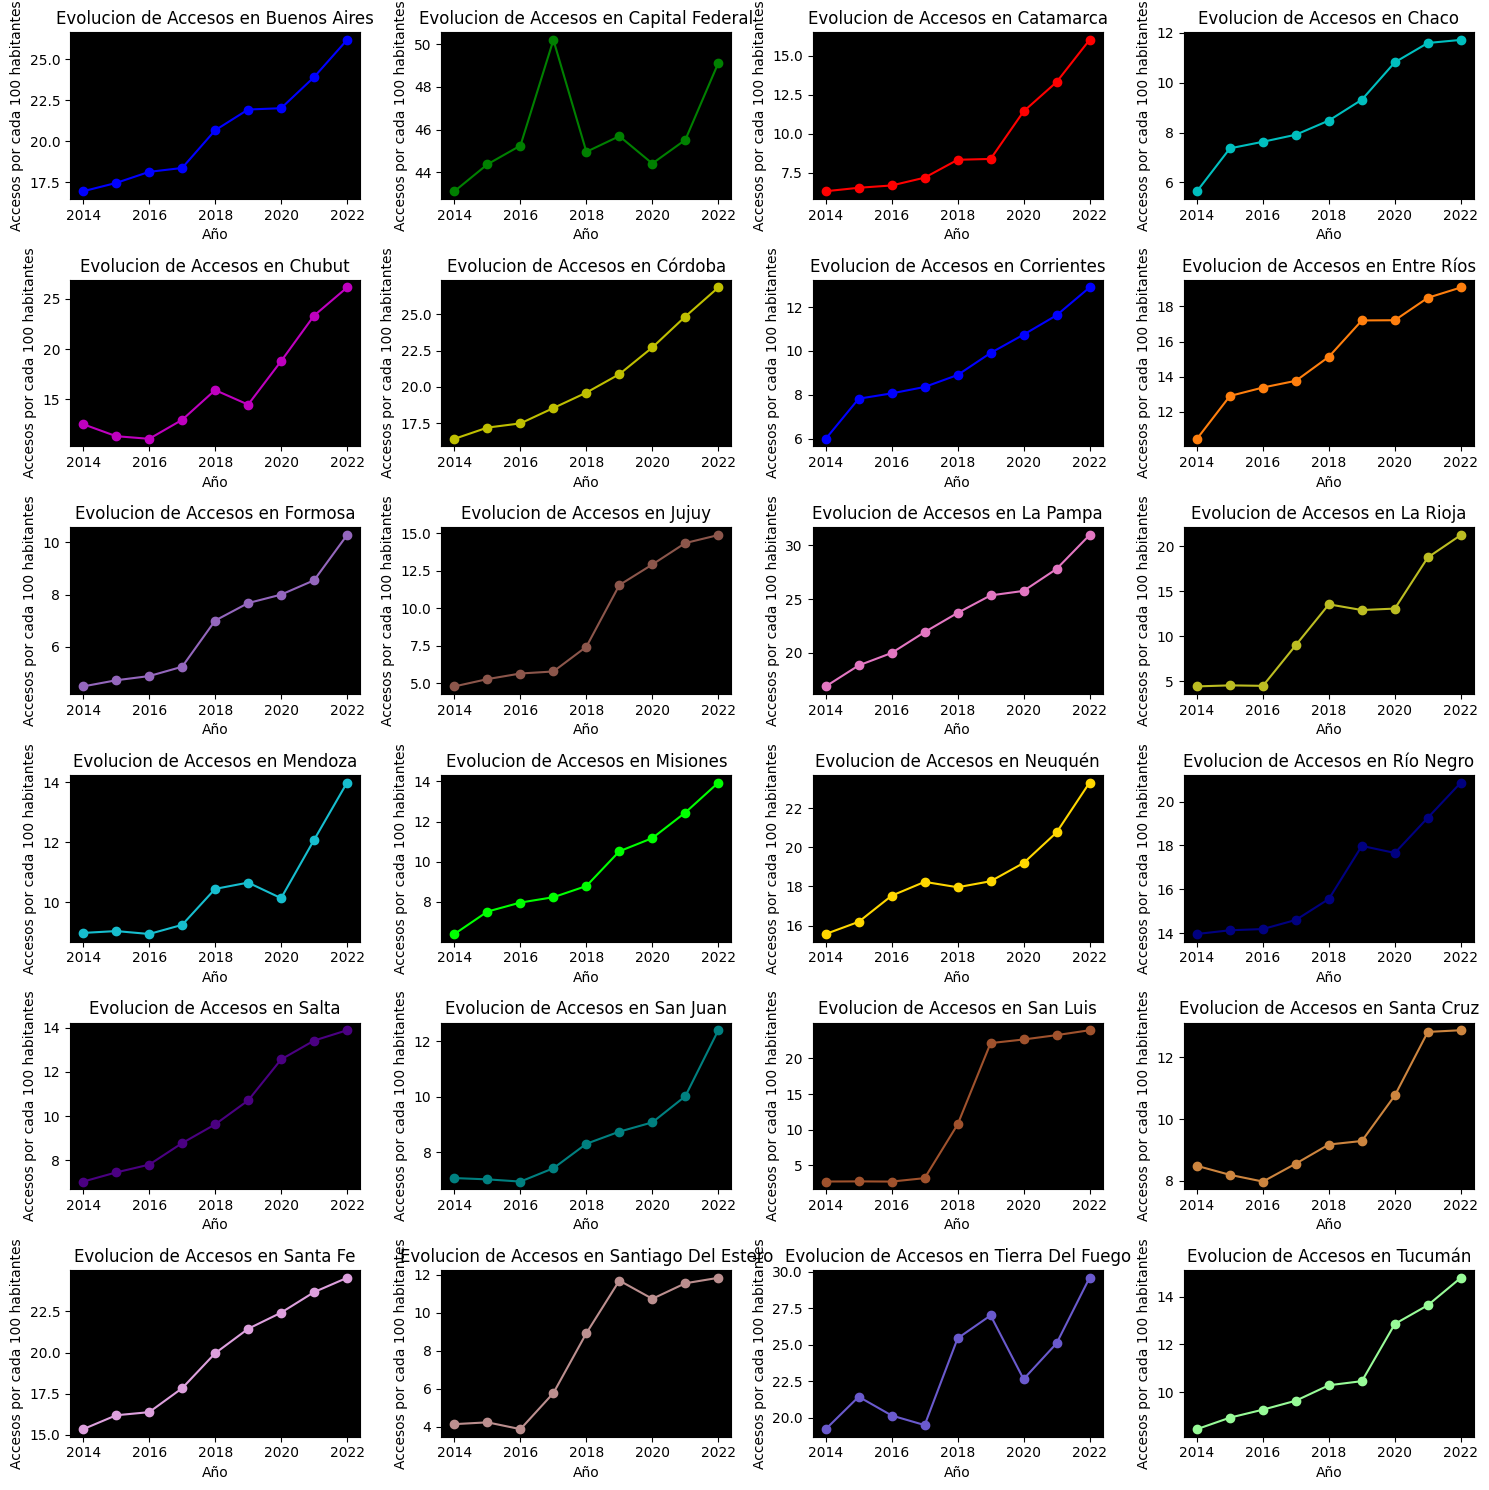

In [79]:
# Obtén los nombres de las provincias
provincias = df['Provincia'].unique()

# Crea los subplots
n_rows = len(provincias) // 4 + (len(provincias) % 4 > 0)
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

# Aplana los ejes para un acceso más fácil
axes = axes.flatten()

# Colores personalizados para cada provincia
colores = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'tab:orange', 'tab:purple', 'tab:brown',
           'tab:pink', 'tab:olive', 'tab:cyan', 'lime', 'gold', 'navy', 'indigo', 'teal',
           'sienna', 'peru', 'plum', 'rosybrown', 'slateblue', 'palegreen', 'maroon']


# Itera sobre las provincias y los colores
for i, (provincia, color) in enumerate(zip(provincias, colores)):
    # Filtra los datos para la provincia actual
    df_provincia = df[df['Provincia'] == provincia]

    # Agrupa los datos por año y calcula los accesos promedio
    df_provincia_grouped = df_provincia.groupby('Año')['Accesos por cada 100 hab'].mean()

    # Crea el gráfico de líneas en el subplot correspondiente
    axes[i].plot(df_provincia_grouped.index, df_provincia_grouped.values, marker='o', color=color)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Accesos por cada 100 habitantes')
    axes[i].set_title(f'Evolucion de Accesos en {provincia}')
    axes[i].set_facecolor('black')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()



El propósito central de este análisis radica en la representación visual de la variación anual en el promedio de acceso a Internet, provincia por provincia.

1- Cada provincia se presenta a través de un gráfico de líneas individual, donde el eje horizontal refleja el año y el eje vertical expone el promedio de accesos por cada 100 habitantes.

2- El matiz de cada línea se asocia con una paleta de colores suaves, simplificando la distinción entre las distintas provincias. Además, se ha implementado un fondo de tonalidad gris clara en cada subgráfico, realzando la claridad visual de los gráficos.

3- Al analizar estos gráficos, se nos brinda una comprensión nítida de la evolución del promedio de accesos a Internet en cada provincia a lo largo del tiempo. Esto nos capacita para identificar patrones, tales como incrementos o decrementos generales en el acceso a Internet, o modificaciones en la velocidad media de conexión.

La penetración de Internet se refiere al porcentaje de la población en una determinada área que goza de acceso a la red. En este contexto, las provincias con una penetración inferior al 20% revelan oportunidades para la expansión de Internet. Estas regiones podrían beneficiarse de inversiones en infraestructura de Internet, políticas destinadas a la inclusión digital y programas de formación en competencias digitales.

Conviene resaltar que, aunque la penetración de Internet constituye un indicador fundamental del progreso digital, no es el único factor a tener en cuenta. Otros indicadores, como la velocidad de conexión y la disponibilidad de servicios de Internet, también ejercen un papel esencial en el desarrollo digital de una región.

### Guardamos en .csv para su posterior uso en PowerBI

In [80]:
df.to_csv('data/cleaned/Acceso_cada_100_hab.csv', sep=';', index=False)

## Acceso por cada 100 hogares

In [81]:
df = pd.read_excel('data/raw/1_Internet_Penetracion.xlsx', sheet_name='Penetracion-hogares')

df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.940000
1,2022,4,Capital Federal,122.730000
2,2022,4,Catamarca,65.770000
3,2022,4,Chaco,43.620000
4,2022,4,Chubut,85.570000
...,...,...,...,...
859,2014,1,Santa Cruz,28.939093
860,2014,1,Santa Fe,47.847663
861,2014,1,Santiago Del Estero,16.309924
862,2014,1,Tierra Del Fuego,63.965926


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [83]:
df['Provincia'] = df['Provincia'].astype('category')

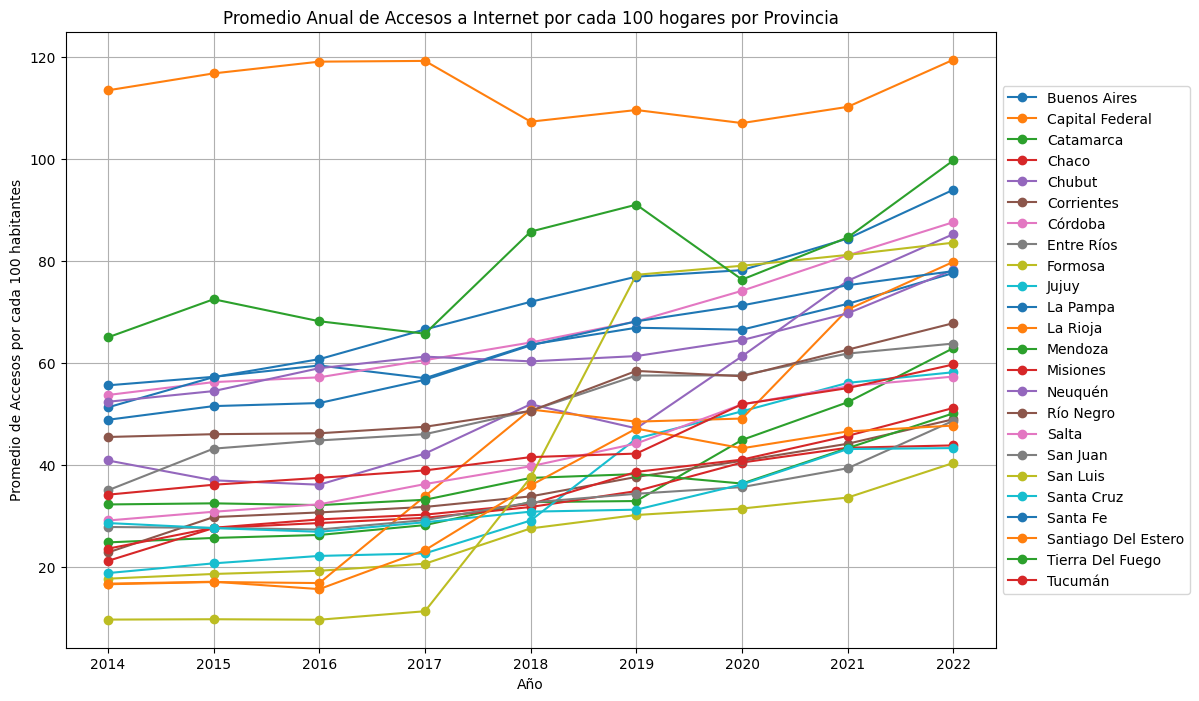

In [84]:
# Agrupamos por año y provincia, y calculamos el promedio de Accesos por cada 100 hogares
promedios_por_provincia = df.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack()

# Creamos un gráfico de líneas múltiples con una línea por provincia
plt.figure(figsize=(12, 8))
for provincia in promedios_por_provincia.columns:
    plt.plot(promedios_por_provincia.index, promedios_por_provincia[provincia], marker='o', label=provincia)

plt.xlabel('Año')

plt.ylabel('Promedio de Accesos por cada 100 habitantes')

plt.title('Promedio Anual de Accesos a Internet por cada 100 hogares por Provincia')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

plt.show()

El gráfico de líneas que se presenta a continuación ofrece una representación visual de la transformación del acceso a Internet a lo largo de los años, abarcando diversas provincias. En esta representación:

- **Eje X:** Se dedica a ilustrar el progreso a lo largo del tiempo, con los años dispuestos de manera cronológica.
- **Eje Y:** Revela el acceso a Internet expresado en términos de la cantidad de conexiones por cada 100 hogares en las distintas provincias.

#### Verificamos outliers

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

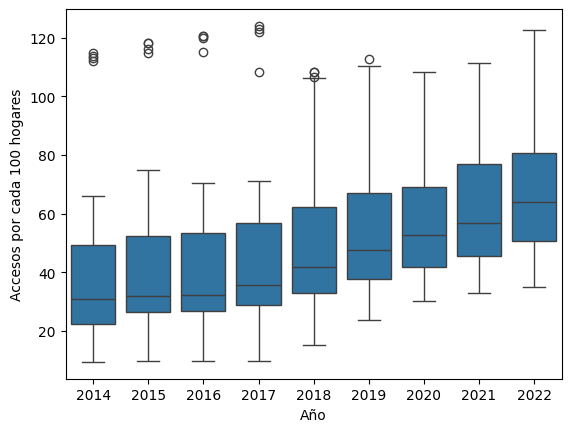

In [85]:
sns.boxplot(x='Año',y='Accesos por cada 100 hogares', data = df)

Como en el dataset anterior podemos observar que los valores anormales vuelven a coincidir con los datos de capital federal por lo que no nos preocupamos

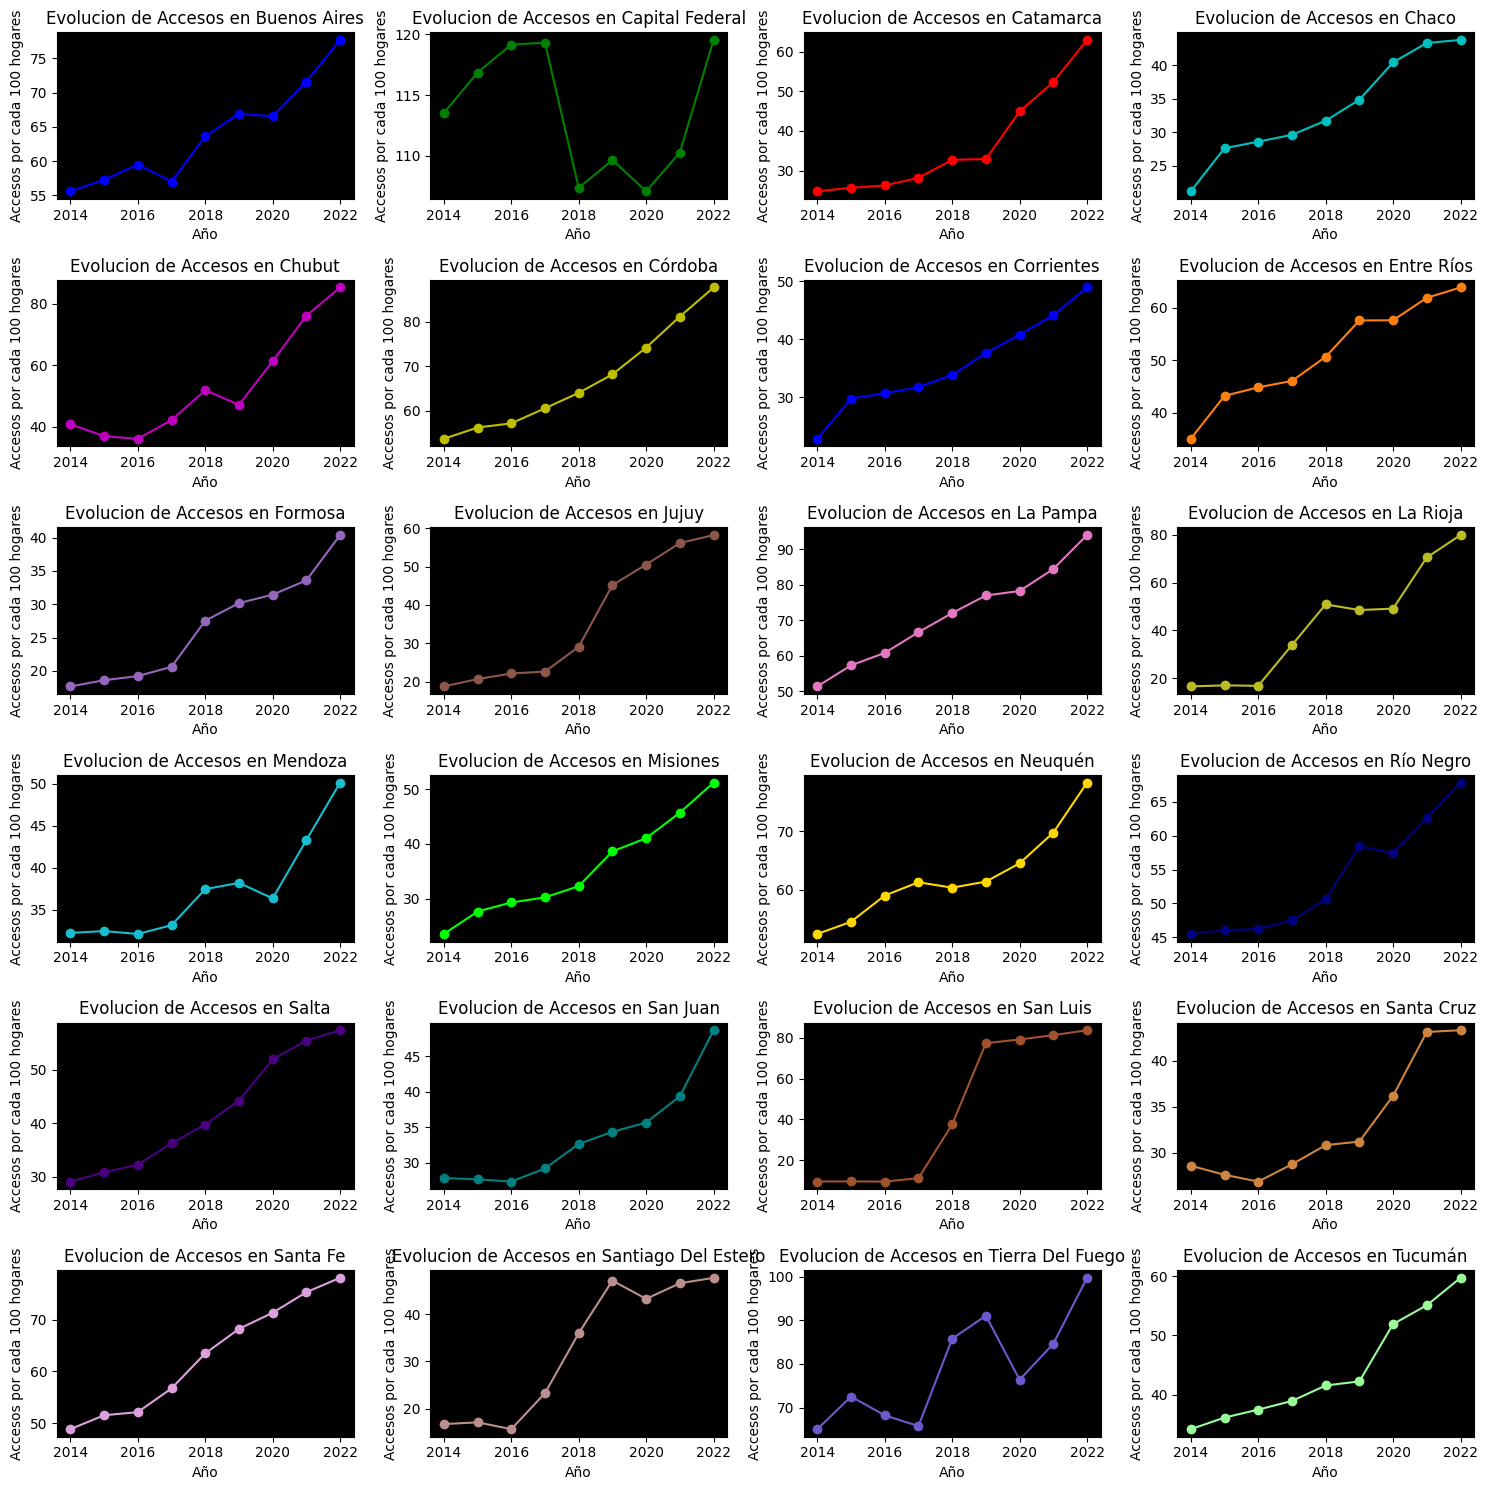

In [86]:
import matplotlib.pyplot as plt

# Obtén los nombres de las provincias
provincias = df['Provincia'].unique()

# Crea los subplots
n_rows = len(provincias) // 4 + (len(provincias) % 4 > 0)
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

# Aplana los ejes para un acceso más fácil
axes = axes.flatten()

# Colores personalizados para cada provincia
colores = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'tab:orange', 'tab:purple', 'tab:brown',
           'tab:pink', 'tab:olive', 'tab:cyan', 'lime', 'gold', 'navy', 'indigo', 'teal',
           'sienna', 'peru', 'plum', 'rosybrown', 'slateblue', 'palegreen', 'maroon']


# Itera sobre las provincias y los colores
for i, (provincia, color) in enumerate(zip(provincias, colores)):
    # Filtra los datos para la provincia actual
    df_provincia = df[df['Provincia'] == provincia]

    # Agrupa los datos por año y calcula los accesos promedio
    df_provincia_grouped = df_provincia.groupby('Año')['Accesos por cada 100 hogares'].mean()

    # Crea el gráfico de líneas en el subplot correspondiente
    axes[i].plot(df_provincia_grouped.index, df_provincia_grouped.values, marker='o', color=color)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Accesos por cada 100 hogares')
    axes[i].set_title(f'Evolucion de Accesos en {provincia}')
    axes[i].set_facecolor('black')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra el gráfico
plt.show()


El propósito central de este análisis radica en la representación visual de la variación anual en el promedio de acceso a Internet, provincia por provincia.

1- Cada provincia se presenta a través de un gráfico de líneas individual, donde el eje horizontal refleja el año y el eje vertical expone el promedio de accesos por cada 100 hogares.

2- El matiz de cada línea se asocia con una paleta de colores suaves, simplificando la distinción entre las distintas provincias. Además, se ha implementado un fondo de color negro en cada subgráfico, realzando la claridad visual de los gráficos.

3- Al analizar estos gráficos, se nos brinda una comprensión nítida de la evolución del promedio de accesos a Internet en cada provincia a lo largo del tiempo. Esto nos capacita para identificar patrones, tales como incrementos o decrementos generales en el acceso a Internet, o modificaciones en la velocidad media de conexión.

La penetración de Internet se refiere al porcentaje de la población en una determinada área que goza de acceso a la red. En este contexto, las provincias con una penetración inferior al 60% revelan oportunidades para la expansión de Internet. Estas regiones podrían beneficiarse de inversiones en infraestructura de Internet, políticas destinadas a la inclusión digital y programas de formación en competencias digitales.

Conviene resaltar que, aunque la penetración de Internet constituye un indicador fundamental del progreso digital, no es el único factor a tener en cuenta. Otros indicadores, como la velocidad de conexión y la disponibilidad de servicios de Internet, también ejercen un papel esencial en el desarrollo digital de una región.

## KPI propuesto
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [87]:
# Filtrar el DataFrame para obtener los datos del último año (2022) y trimestre (4)
año_trimestre = df[(df['Año'] == 2022) & (df['Trimestre'] == 4)].copy()

# Aplicar una mejora a la métrica 'Accesos por cada 100 hogares'
año_trimestre['Mejorar 2K'] = ((año_trimestre['Accesos por cada 100 hogares'] * 2) / 100) + año_trimestre['Accesos por cada 100 hogares']

# Guardar los datos mejorados en un archivo CSV
año_trimestre.to_csv('data/cleaned/aumento_2%_ultTrim.csv', sep=';', index=False)


In [88]:
df['Proximo Trimestre'] = None

In [89]:

# Obtener la lista de provincias únicas
provincias = df['Provincia'].unique().tolist()

# Actualizar el valor 'Mes proximo' para las provincias que no son del último año y trimestre
for provincia in provincias:
    lista = df.loc[df['Provincia'] == provincia, 'Accesos por cada 100 hogares'].to_list()
    lista = lista[:-1]
    mask = ((df['Provincia'] == provincia) & ((df['Año'] != 2022) | (df['Trimestre'] != 4)))
    df.loc[mask, 'Proximo Trimestre'] = lista

# Actualizar el valor 'Mes proximo' para las provincias del último año y trimestre
for provincia in provincias:
    lista = df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Accesos por cada 100 hogares'].to_list()
    mask = (df['Provincia'] == provincia) & (df['Año'] == 2022) & (df['Trimestre'] == 4)
    df.loc[mask, 'Proximo Trimestre'] = lista


In [90]:
df.to_csv('data/cleaned/Acceso_cada_100_hog.csv', sep=';', index=False)

## Acceso total a lo largo del pais

In [91]:
df = pd.read_excel('data/raw/1_Internet_Penetracion.xlsx', sheet_name='Penetracion-totales')

df

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021
5,2021,3,70.578853,21.982550,Jul-Sept 2021
6,2021,2,69.240183,21.547939,Abr-Jun 2021
7,2021,1,67.945876,21.127832,Ene-Mar 2021
8,2020,4,67.622339,21.010192,Oct-Dic 2020
9,2020,3,66.310000,20.590000,Jul-Sept 2020


En lugar de desglosar los datos por provincias, este conjunto de datos presenta una visión global de las métricas de acceso a Internet, tanto por cada 100 habitantes como por cada 100 hogares, a lo largo de varios años y trimestres. 

En otras palabras, en lugar de analizar los datos provincia por provincia, se ofrece una visión general que abarca un período más amplio y considera al pais en un conjunto.

### Grafico de acceso total

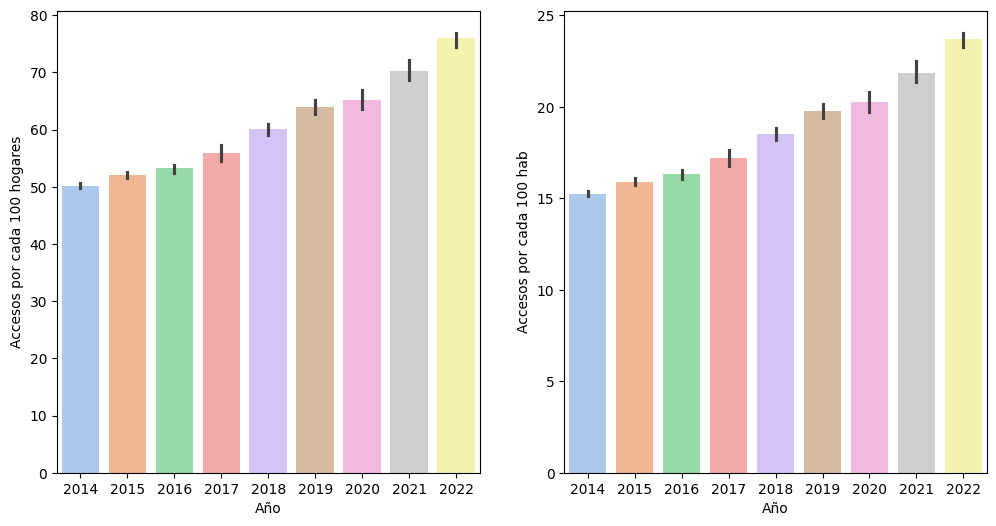

In [92]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

sns.barplot(x='Año', data =df, y='Accesos por cada 100 hogares', palette='pastel', hue='Año',legend=False)

plt.subplot(1,2,2)

sns.barplot(x='Año', data =df, y='Accesos por cada 100 hab', palette='pastel', hue='Año', legend=False)

plt.show()

Esta observación destaca que, a pesar de las diferencias iniciales, el acceso a Internet en la población en general está en constante ascenso. 

Esto implica que con el correr de los años, se están registrando mejoras significativas en la disponibilidad de Internet en los hogares y en la conectividad por cada habitante

### Verificamos outliers

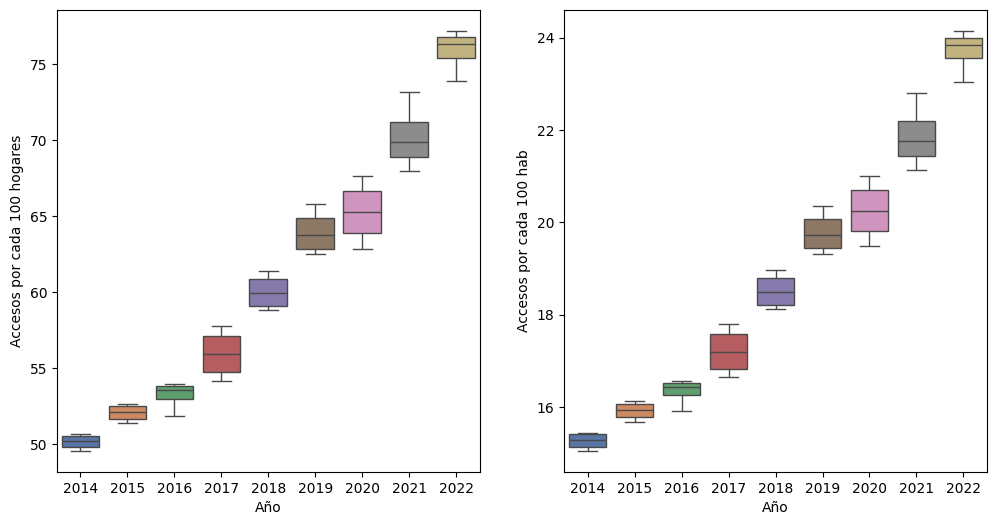

In [93]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

sns.boxplot(x='Año', data =df, y='Accesos por cada 100 hogares', palette='deep', hue='Año',legend=False)

plt.subplot(1,2,2)

sns.boxplot(x='Año', data =df, y='Accesos por cada 100 hab', palette='deep', hue='Año', legend=False)

plt.show()

No se observa ningun outlier para el dataset de accesos totales por año, por lo que nos quedamos tranquilos

In [94]:
df.to_csv('data/cleaned/Acceso_total.csv', sep=';', index=False)

## Historico de velocidad

In [95]:
df = pd.read_excel('data/raw/4_historico_velocidad_internet.xlsx')
df


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
4,2022,4,Chubut,15.920000
...,...,...,...,...
859,2014,1,Santa Cruz,3.315991
860,2014,1,Santa Fe,3.147407
861,2014,1,Santiago Del Estero,2.949472
862,2014,1,Tierra Del Fuego,3.446888



El conjunto de datos proporciona información sobre la velocidad media de descarga de conexión a Internet, medida en Megabits por segundo (Mbps), en diferentes provincias de Argentina a lo largo de varios años y trimestres. Cada fila del conjunto de datos representa una observación específica y contiene los siguientes atributos:

* Año: El año al que se refiere la observación, abarcando desde 2014 hasta 2022.

* Trimestre: El trimestre del año al que pertenecen los datos, representado como un número del 1 al 4.

* Provincia: El nombre de la provincia en Argentina a la que pertenecen los datos.

* Mbps (Media de bajada): La velocidad media de descarga de la conexión a Internet en Megabits por segundo en la provincia correspondiente.

El objetivo de este conjunto de datos es proporcionar información detallada sobre la velocidad de descarga de Internet en diferentes regiones de Argentina, permitiendo análisis y comparaciones a lo largo del tiempo y entre provincias. Esto puede ser de utilidad para evaluar tendencias en la calidad de la conexión a Internet en distintas áreas geográficas y para respaldar decisiones relacionadas con la infraestructura de telecomunicaciones y el acceso a Internet en el país.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Vemos que no tiene ningun valor nulo

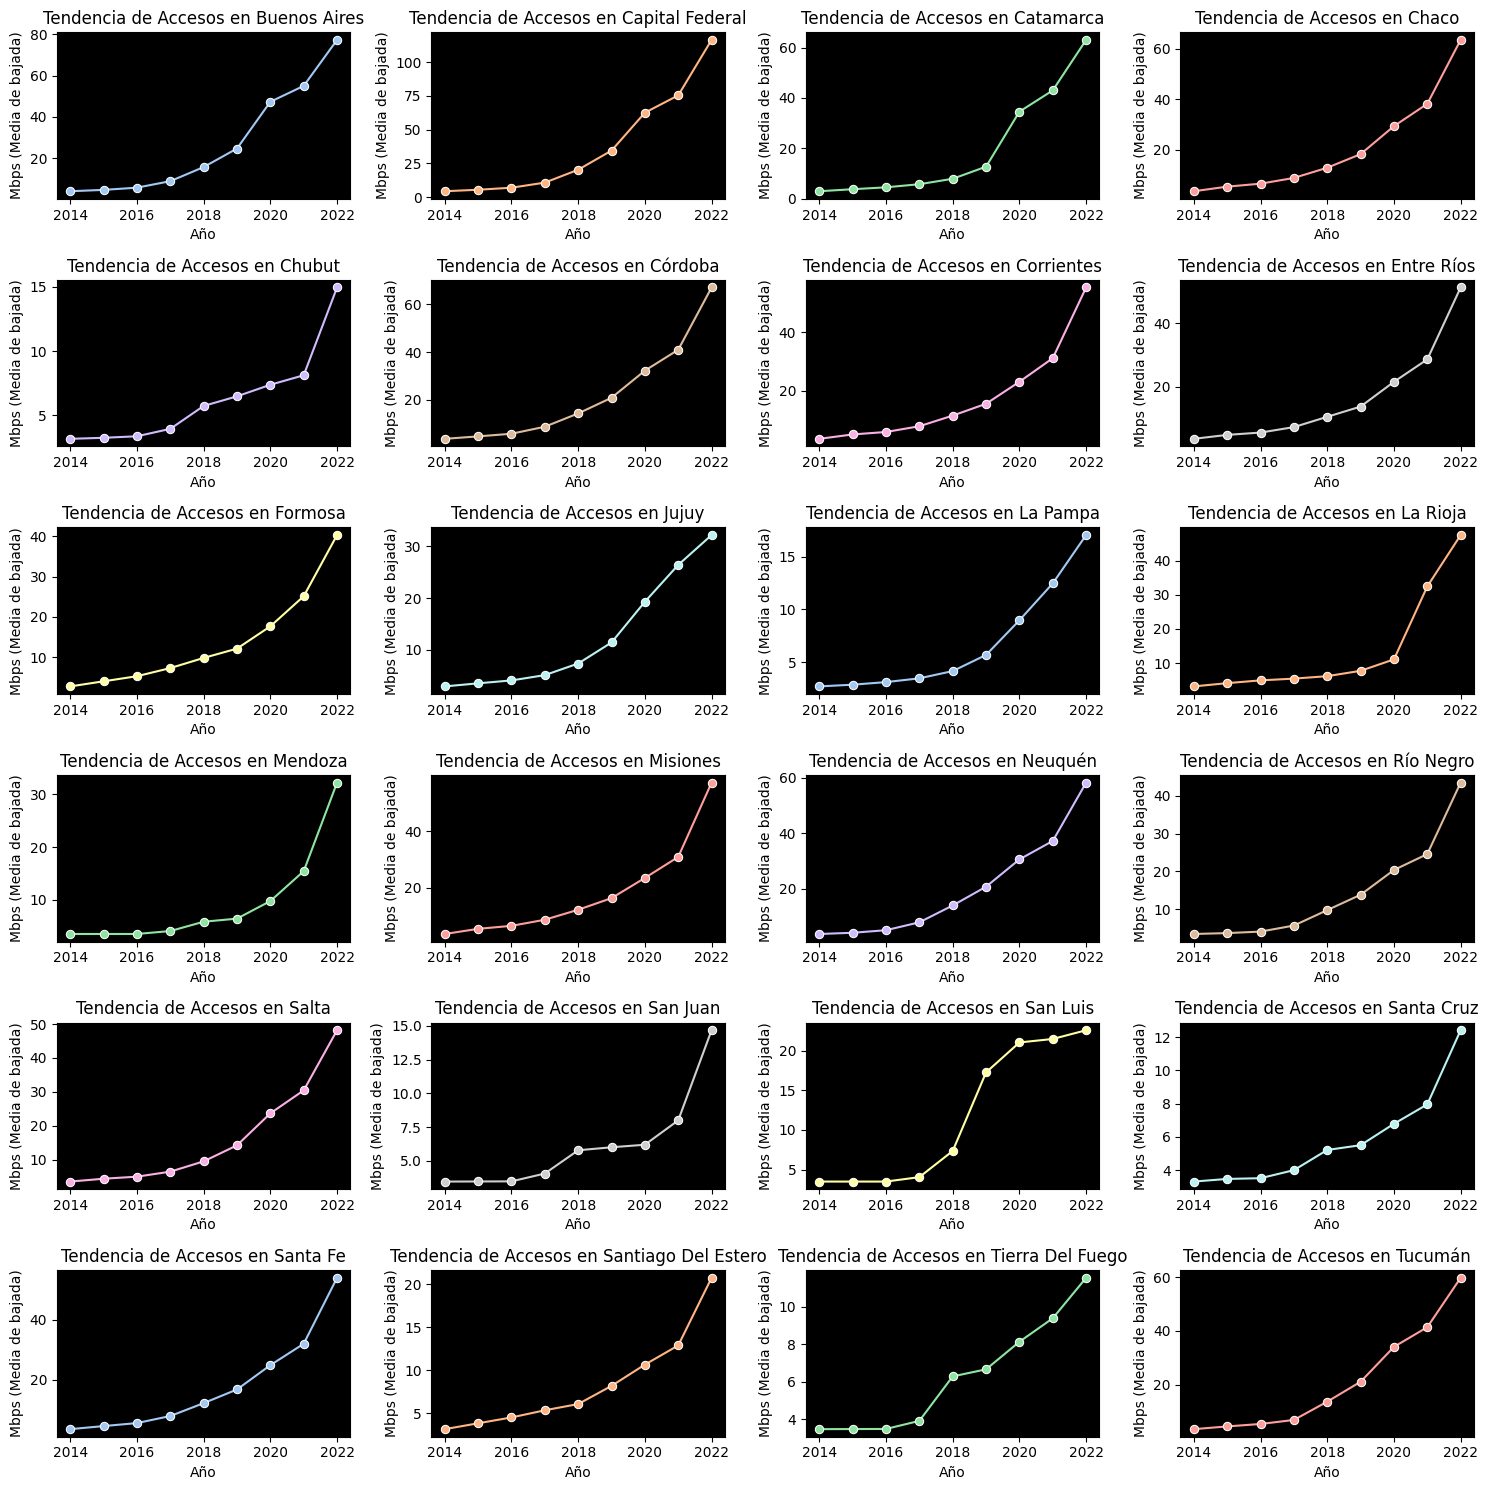

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtén los nombres de las provincias
provincias = df['Provincia'].unique()

# Crea los subtramas
n_rows = len(provincias) // 4 + (len(provincias) % 4 > 0)
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

# Aplana los ejes para un acceso más fácil
axes = axes.flatten()

# Crea un generador de colores pastel
colormap = sns.color_palette("pastel", n_colors=len(provincias))

# Itera sobre las provincias
for i, provincia in enumerate(provincias):
    # Filtra los datos para la provincia actual
    df_provincia = df[df['Provincia'] == provincia]

    # Agrupa los datos por año y calcula los accesos promedio
    df_provincia_grouped = df_provincia.groupby('Año')['Mbps (Media de bajada)'].mean()

    # Crea el gráfico de líneas en el subtrama correspondiente
    sns.lineplot(x=df_provincia_grouped.index, y=df_provincia_grouped.values, marker='o', color=colormap[i], ax=axes[i])
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Mbps (Media de bajada)')
    axes[i].set_title(f'Tendencia de Accesos en {provincia}')
    axes[i].set_facecolor('black')

# Ajusta el espaciado entre los subtramas
plt.tight_layout()

# Muestra el gráfico
plt.show()


1- Cada provincia se representa con un gráfico de línea diferente, donde el eje x representa el año y el eje y representa la velocidad promedio del internet en Mbps(megabytes por segundo).

2- El color de cada línea corresponde a una paleta de colores pastel, lo que facilita la distinción entre las diferentes provincias. Además, se ha establecido un fondo de color negro para cada subplot, lo que mejora la legibilidad de los gráficos.

Analizando los graficos se puede observar una clara tendencia alsista en la velocidad del internet por provincia por año por lo que podemos decir que hubo inversiones en infraestructura tecnologia para la mejora del acceso a internet con una velocidad aprovechable para diferentes tareas.

Como en el resto de graficos se puede observar una fuerte superioridad en capital federal lo cual si no supiesemos nada de este pais nos dariamos cuenta que puede llegar a ser la capital del pais o una ciudad muy importante.

### Verificamos Outliers

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

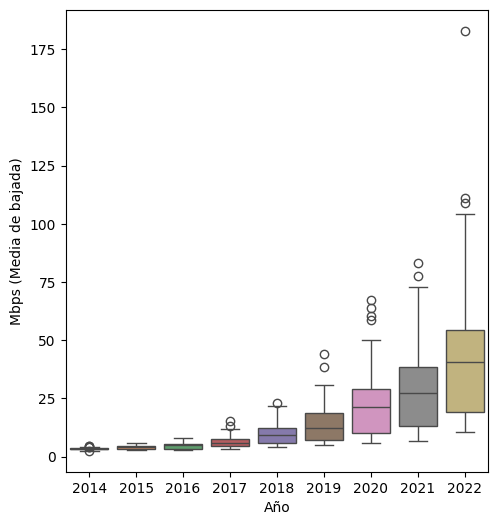

In [98]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

sns.boxplot(x='Año', data =df, y='Mbps (Media de bajada)', palette='deep', hue='Año',legend=False)



Podemos observar varios outliers pero no suficientes para que sea por lo que preocuparnos ya que nos damos cuenta quie son los datos de Capital Federal

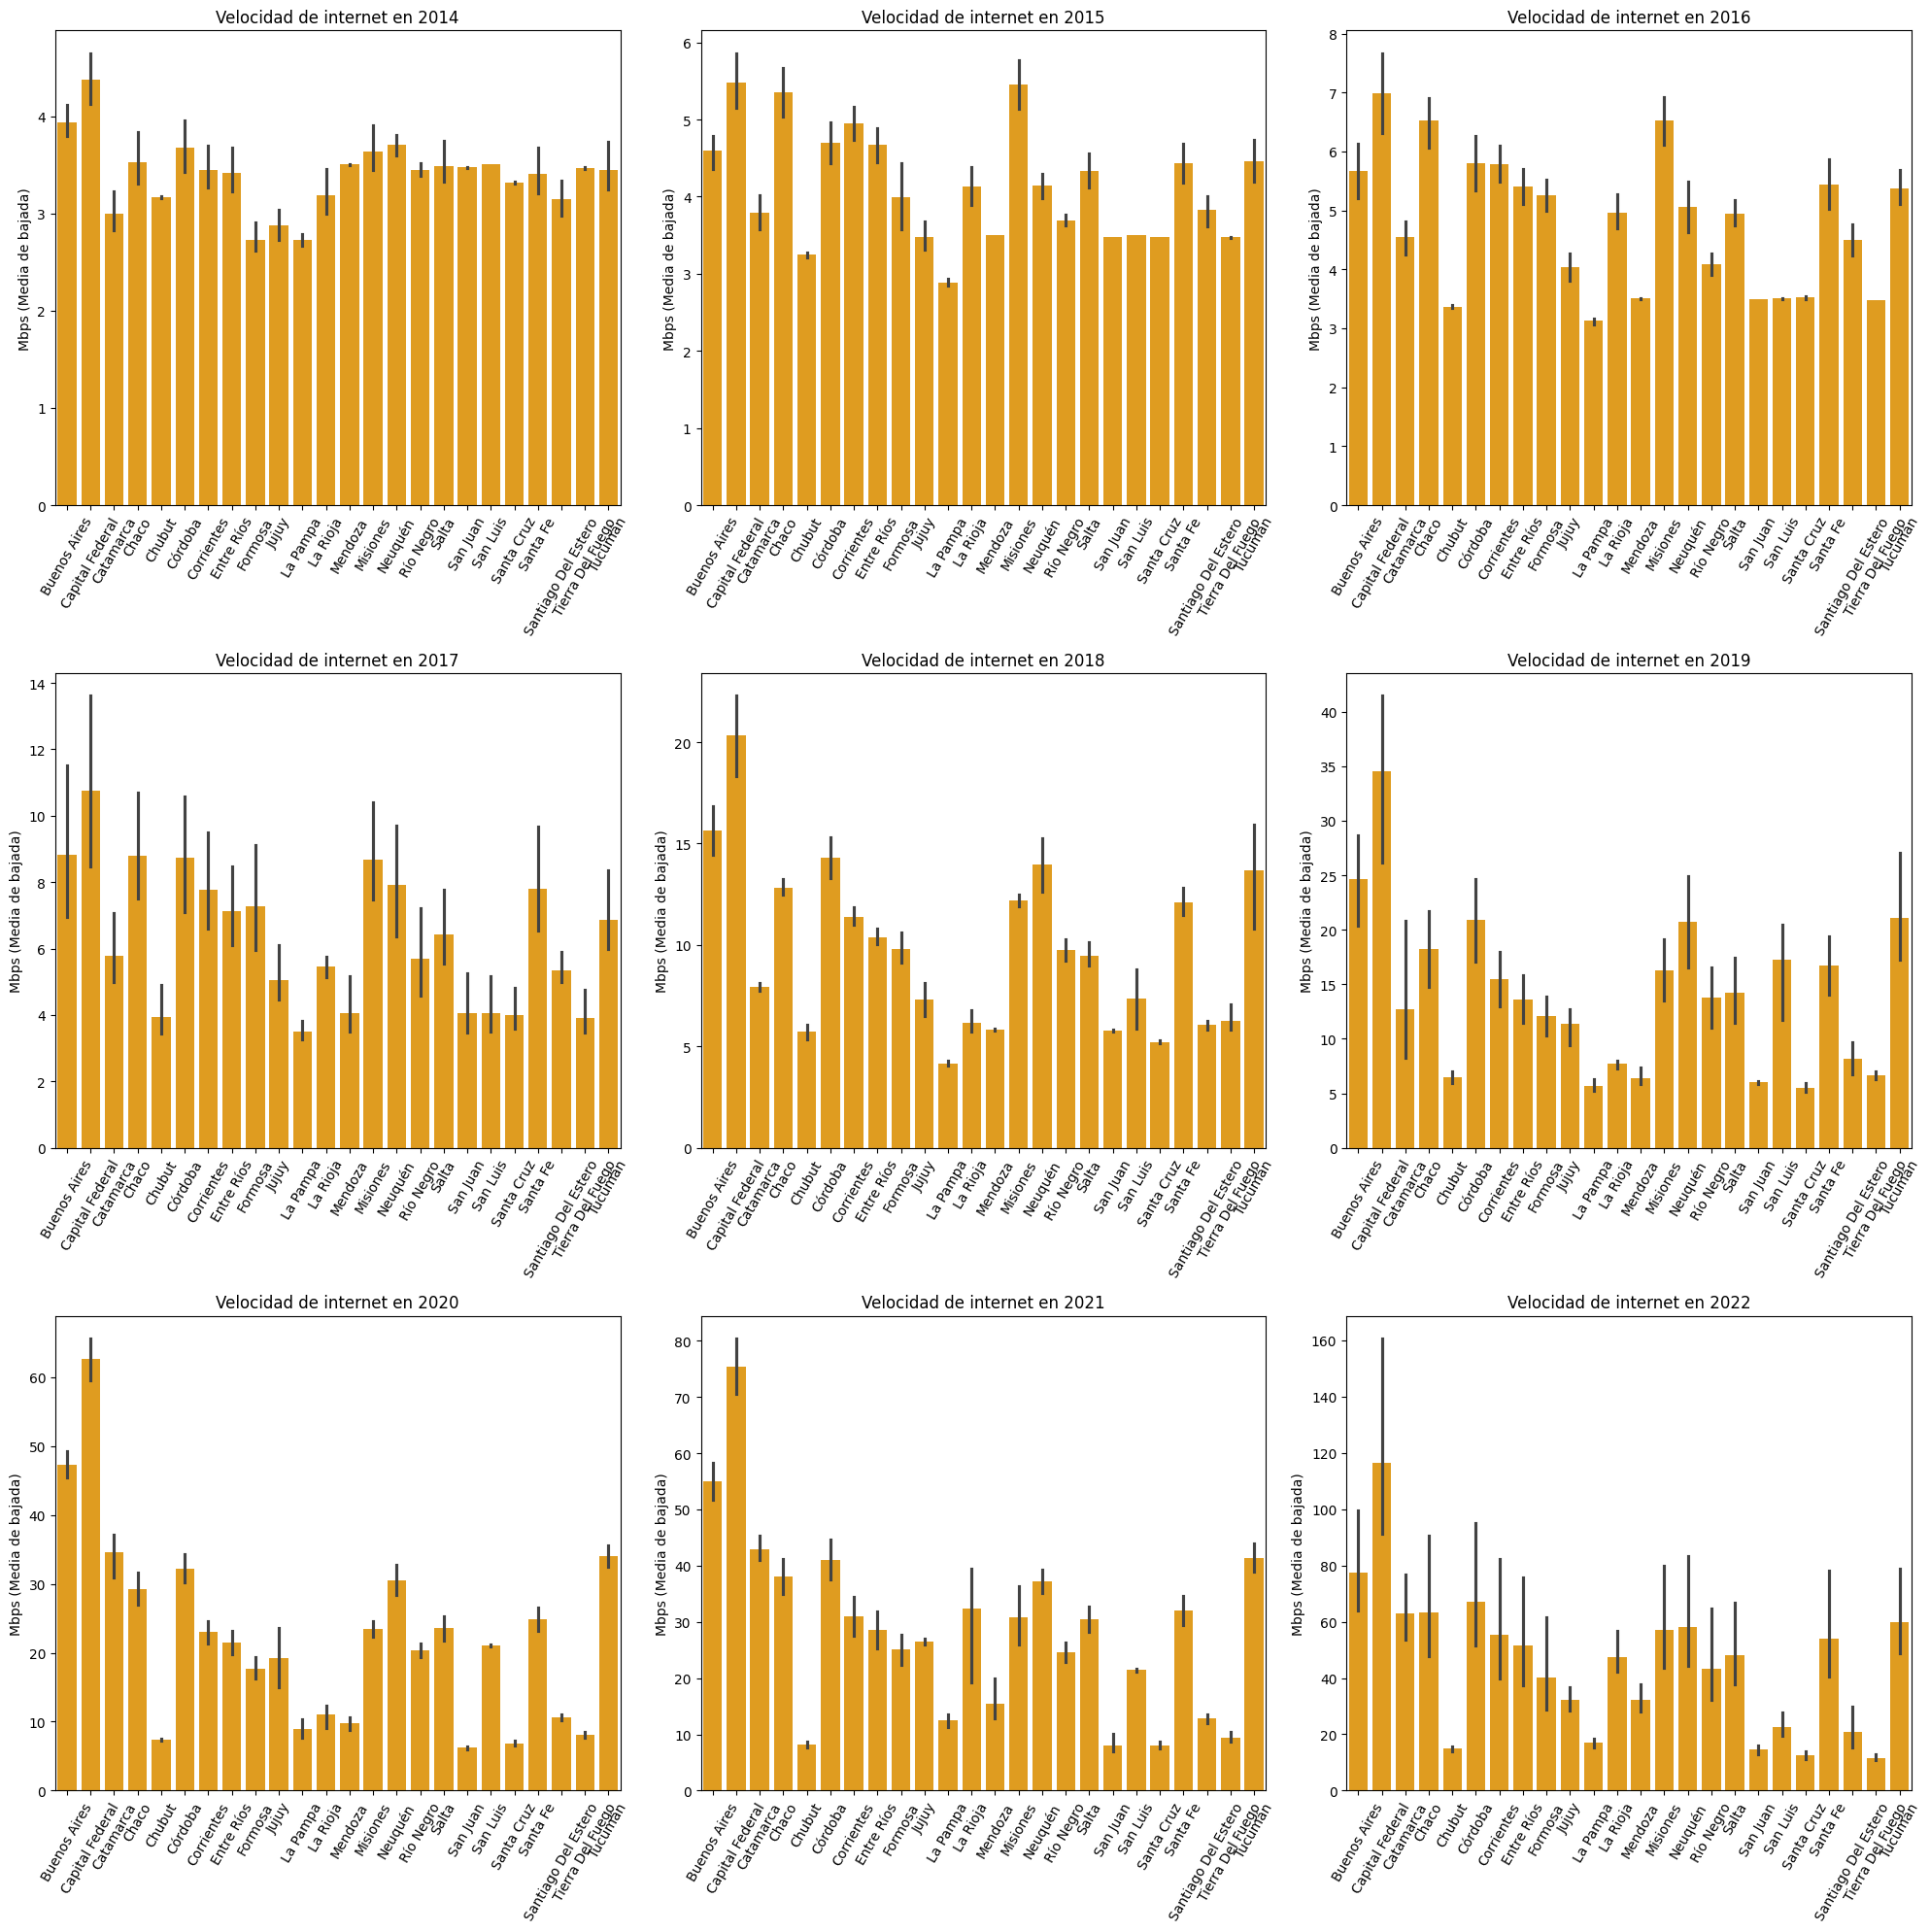

In [99]:
# Define el número de filas y columnas para organizar los gráficos
n_filas = 3
n_columnas = 3

plt.figure(figsize=(20, 20))

for i, año in enumerate(sorted(df['Año'].unique())):
    plt.subplot(n_filas, n_columnas, i + 1)
    sns.barplot(data=df[df['Año'] == año], y='Mbps (Media de bajada)', x='Provincia', color='orange')
    plt.xticks(rotation=60)
    plt.title(f'Velocidad de internet en {año}')
    plt.xlabel('')

# Ajusta el espaciado entre los gráficos
plt.tight_layout()

plt.show()


En las representaciones gráficas, se puede observar de manera evidente cómo la velocidad de descarga en megabits por segundo (Mbps) ha experimentado un incremento en la mayoría de las provincias a lo largo del tiempo. No obstante, también resulta evidente que algunas provincias, como Chubut, han mantenido una velocidad de Internet relativamente estable sin experimentar un crecimiento significativo en comparación con otras regiones. Estos gráficos proporcionan una representación visual que permite identificar las diferencias en la evolución de la velocidad de Internet entre las distintas provincias.

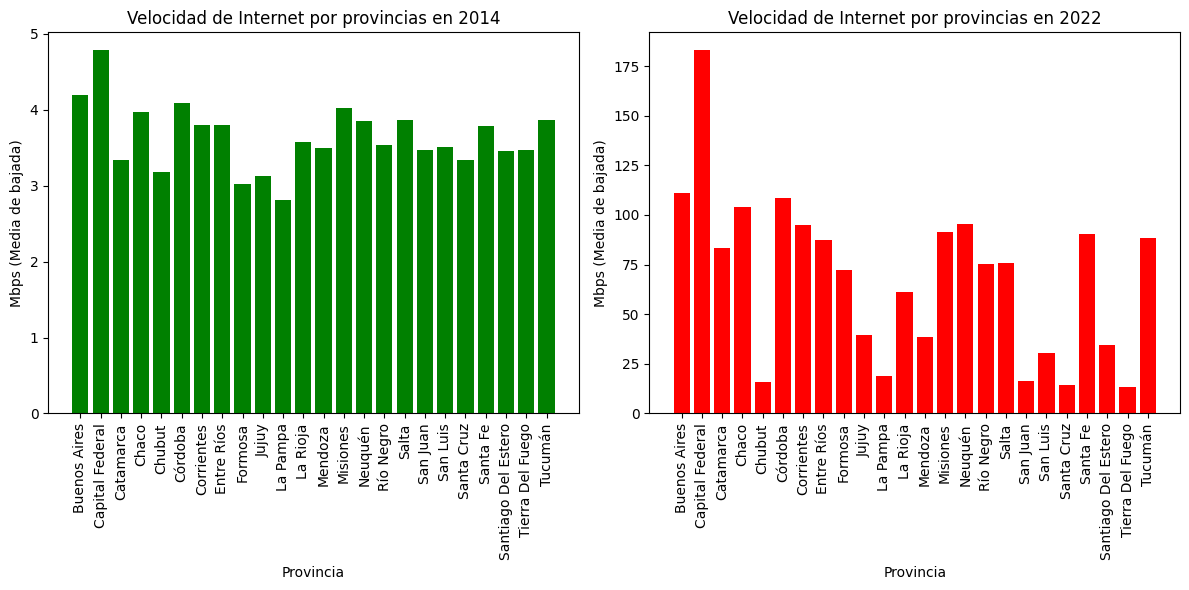

In [100]:
# Filtra el DataFrame para obtener datos de 2014 y 2022
df_2014 = df[df['Año'] == 2014]
df_2022 = df[df['Año'] == 2022]

# Gráfico 1: Velocidad de Internet por provincias en 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(df_2014['Provincia'], df_2014['Mbps (Media de bajada)'], color='green')  # Cambia el color a verde
plt.xticks(rotation=90)
plt.title('Velocidad de Internet por provincias en 2014')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')

# Gráfico 2: Velocidad de Internet por provincias en 2022
plt.subplot(1, 2, 2)
plt.bar(df_2022['Provincia'], df_2022['Mbps (Media de bajada)'], color='red')  # Cambia el color a rojo
plt.xticks(rotation=90)
plt.title('Velocidad de Internet por provincias en 2022')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')

plt.tight_layout()
plt.show()


Aca hay dos graficos sobre la media de velocidad del internet en cada provincia, uno para el anio 2014 y otro para el anio 2022.

En el primer grafico correspondiente al anio 2014 se nota una velocidad bastante equilibrada entre las provincias siendo capital federal(aunque no sea una provincia) la que predomina como en la mayoria de los otros ambitos y en el grafico del anio 2022 se ve un claro desequilibrio entre las diferentes provincias por lo que por mi cuenta propongo hacer un KPI para llegar a una mejor estabilizacion de las diferencia entre provincias

## KPI

C:\Users\joaqu\AppData\Local\Temp\ipykernel_18388\2528769521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[(df['Año'] == 2022) & (df['Mbps (Media de bajada)'] < 30)], y='Mbps (Media de bajada)', x='Provincia', palette='Set2')


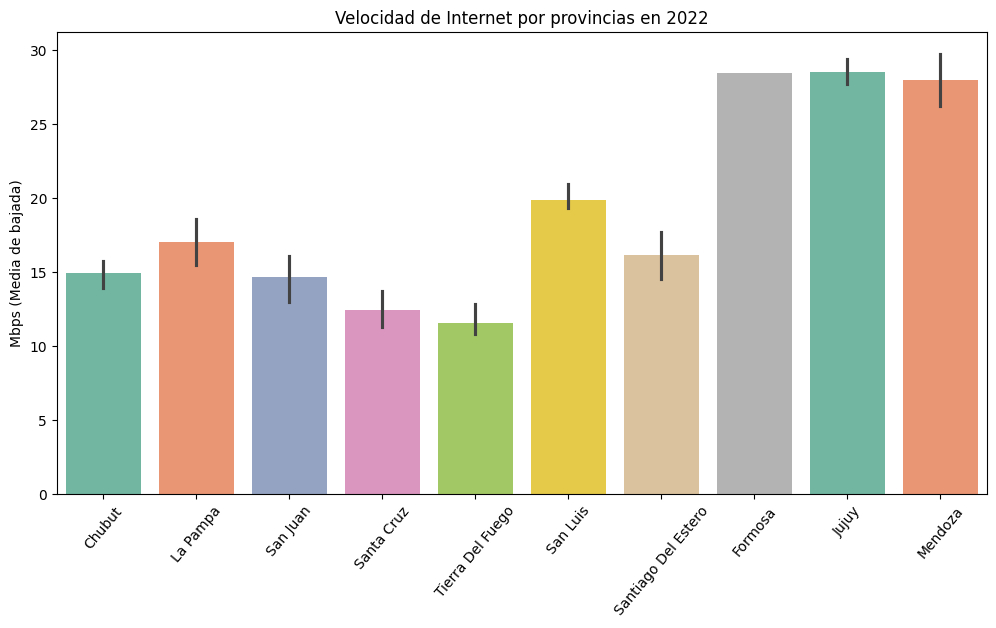

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[(df['Año'] == 2022) & (df['Mbps (Media de bajada)'] < 30)], y='Mbps (Media de bajada)', x='Provincia', palette='Set2')
plt.xticks(rotation=50)
plt.title('Velocidad de Internet por provincias en 2022')
plt.xlabel('')
plt.show()


Aca podemos observar provincia con promedio de velocidad de internet por debajo de los 30 mbps por lo que presentan una necesidad de inversion en infraestrucutra. Es necesario considerar estrategias para la mejora de internet en estas provincias, que es por lo que he propuesto un KPI:


### MEJORAR EN UN 15% LA CANTIDAD DE MB QUE POSEEN LAS PROVINCIAS CON UN PROMEDIO DE 30 MB.

In [102]:
df['Trimestre proximo'] = None

provincias = df['Provincia'].unique().tolist()

for provincia in provincias:
    lista = df.loc[df['Provincia'] == provincia, 'Mbps (Media de bajada)'].to_list()
    lista = lista[:-1]
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] != 2022) | (df['Trimestre'] != 4)), 'Trimestre proximo'] = lista 

for provincia in provincias:
    lista = df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Mbps (Media de bajada)'].to_list()
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Trimestre proximo'] = lista 

In [103]:
df

,Año,Trimestre,Provincia,Mbps (Media de bajada),Trimestre proximo
0,2022,4,Buenos Aires,111.000000,111.0
1,2022,4,Capital Federal,182.860000,182.86
2,2022,4,Catamarca,83.330000,83.33
3,2022,4,Chaco,104.020000,104.02
4,2022,4,Chubut,15.920000,15.92
...,...,...,...,...,...
859,2014,1,Santa Cruz,3.315991,3.318152
860,2014,1,Santa Fe,3.147407,3.311691
861,2014,1,Santiago Del Estero,2.949472,3.069751
862,2014,1,Tierra Del Fuego,3.446888,3.470096


Convertimos a csv para su posterior uso en PowerBi

In [104]:
df.to_csv('data/cleaned/Historico_velocidad.csv', sep=';', index=False)

## Acceso a Internet fijo por tecnología y provincia

In [105]:
df = pd.read_excel('data/raw/3_Internet_Accesos-por-tecnologia.xlsx', sheet_name='Accesos Por Tecnología')
df

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,"325,908","2,767,247","1,499,149","129,910","72,451","4,794,665"
1,2022,4,Capital Federal,"138,753","1,238,196","138,548","4,603","31,826","1,551,926"
2,2022,4,Catamarca,"8,952","10,998","47,337","1,379","2,243","70,909"
3,2022,4,Chaco,"24,582","61,265","47,285","7,957","2,574","143,663"
4,2022,4,Chubut,"45,450","73,923","9,815","30,721","8,850","168,759"
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"18,927",100,381,"4,092","3,264","26,764"
860,2014,1,Santa Fe,"322,662","174,296","3,059","5,951",644,"506,612"
861,2014,1,Santiago Del Estero,"32,567","3,598",19,915,34,"37,133"
862,2014,1,Tierra Del Fuego,"21,618","2,837",648,1,"2,934","28,038"


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int64 
 1   Trimestre     864 non-null    int64 
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    object
 4   Cablemodem    864 non-null    object
 5   Fibra óptica  864 non-null    object
 6   Wireless      864 non-null    object
 7   Otros         864 non-null    object
 8   Total         864 non-null    object
dtypes: int64(2), object(7)
memory usage: 60.9+ KB


No existen nulos

In [107]:
# Hacemos una lista de las columnas a las que queremos convertir a floats
col_to_conv = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Crea un diccionario con los tipos de datos para cada columna
dtype_dict = {col: str for col in col_to_conv}

# Lee el archivo Excel con las columnas especificadas como strings
df = pd.read_excel('data/raw/3_Internet_Accesos-por-tecnologia.xlsx', sheet_name='Accesos Por Tecnología', dtype=dtype_dict)

# Elimina los caracteres no numéricos de las columnas
for col in col_to_conv:
    df[col] = df[col].str.replace('[., ]', '', regex=True)

# Convertimos todas las columnas a float para facilitar la manipulación
df[col_to_conv] = df[col_to_conv].astype(float)

# Verifica los tipos de datos después de la conversión
print(df.dtypes)


Año               int64
Trimestre         int64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object


Convertimos las columnas a float para su facil manipulacion en graficos y en PowerBi

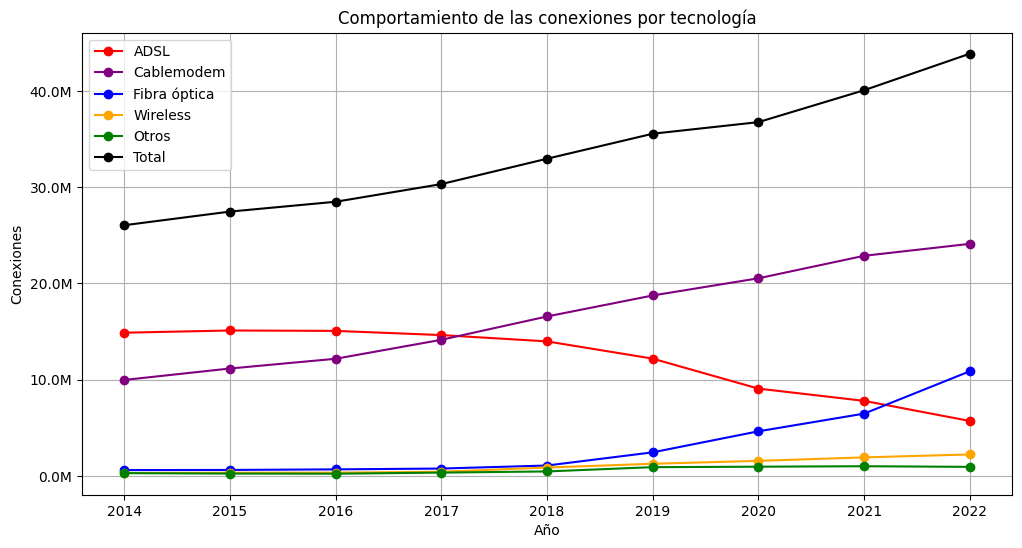

In [108]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Agrupa y suma los datos por año para diferentes tecnologías
tecnologias = df.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum()

# Configura el gráfico
plt.figure(figsize=(12, 6))

colores = {
    'ADSL': 'red',
    'Cablemodem': 'purple',
    'Fibra óptica': 'blue',
    'Wireless': 'orange',
    'Otros': 'green',
    'Total': 'black'
}

# Itera sobre las columnas de velocidad
for columna in tecnologias.columns:
    plt.plot(tecnologias.index, tecnologias[columna], marker='o', label=columna, color=colores[columna])

plt.xlabel('Año')
plt.ylabel('Conexiones')
plt.title('Comportamiento de las conexiones por tecnología')
plt.legend()
plt.grid(True)

# Formatea el eje Y para mostrar millones
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Muestra el gráfico
plt.show()


+ Crecimiento sostenido de la Fibra óptica: En cuanto a la evolución de la tecnología de fibra óptica, observamos un incremento constante a lo largo de los años. Esto evidencia un aumento en el número de conexiones a Internet mediante fibra óptica, lo que concuerda con la tendencia general de migración desde el ADSL hacia esta tecnología. La fibra óptica ofrece velocidades de conexión más rápidas y una mayor fiabilidad, lo que la hace atractiva para los usuarios.

+ Declive persistente del ADSL: Contrariamente, la tecnología ADSL muestra un descenso constante en el número de conexiones a lo largo de los años. Esto refleja la disminución en la adopción de conexiones a Internet por ADSL, lo cual está en línea con la tendencia general de transición hacia la fibra óptica.

+ Crecimiento en las tecnologías Cablemodem y Wireless: Las tecnologías de Cablemodem y Wireless también muestran un crecimiento constante a lo largo de los años, lo que indica un aumento en el número de conexiones a Internet a través de estas tecnologías.

+ Aumento en el número total de conexiones: La columna 'Total' registra un incremento continuo en la cantidad total de conexiones a lo largo de los años, lo que sugiere un aumento en la adopción de Internet en general.

+ Crecimiento desigual entre las tecnologías: Resulta interesante notar que, a pesar del aumento en el 'Total', no todas las tecnologías han experimentado un crecimiento uniforme. Por ejemplo, la adopción de la tecnología 'Fibra óptica' ha aumentado a un ritmo mucho más rápido en comparación con la tecnología 'ADSL'. Esto podría indicar que distintas tecnologías están siendo adoptadas a diferentes velocidades, ya sea en distintas regiones o por diferentes grupos de usuarios.

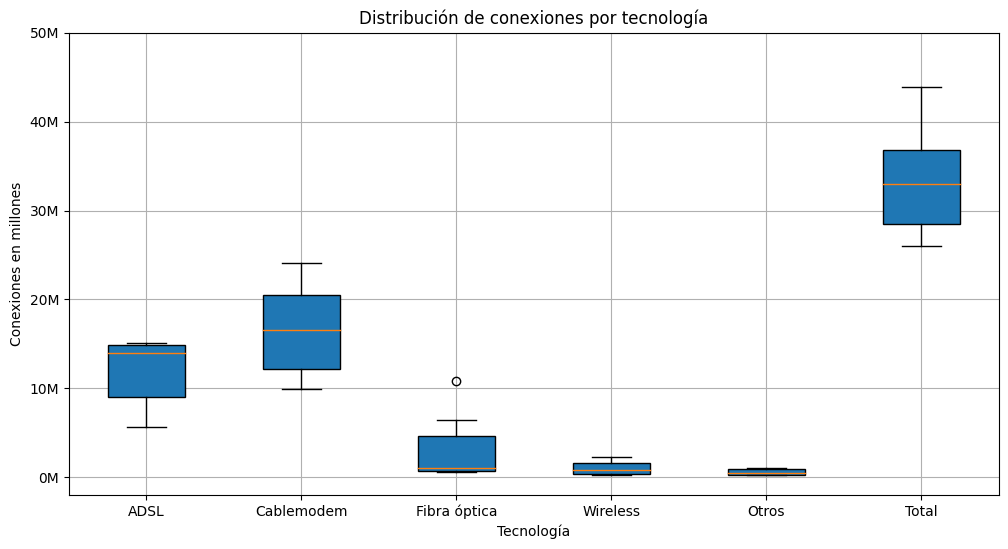

In [109]:
# Configura el gráfico
plt.figure(figsize=(12, 6))

# Crea un diccionario para almacenar los datos de cada tecnología
datos_tecnologias = {col: tecnologias[col].values for col in tecnologias.columns}

# Crea el boxplot
plt.boxplot(datos_tecnologias.values(), labels=datos_tecnologias.keys(), patch_artist=True)

plt.xlabel('Tecnología')
plt.ylabel('Conexiones en millones')
plt.title('Distribución de conexiones por tecnología')
plt.grid(True)

# Formatea el eje y para mostrar en incrementos de 10M
plt.yticks(range(0, 50_000_001, 10_000_000), [f'{i}M' for i in range(0, 51, 10)])

# Muestra el gráfico
plt.show()


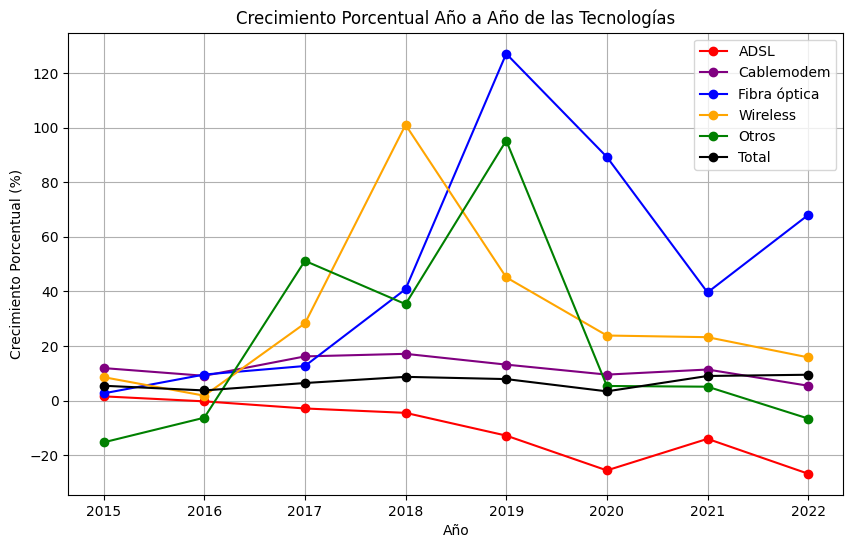

In [110]:
import matplotlib.pyplot as plt

# Calcular el crecimiento porcentual año a año
crecimiento = tecnologias.pct_change() * 100

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

colores = {
    'ADSL': 'red',
    'Cablemodem': 'purple',
    'Fibra óptica': 'blue',
    'Wireless': 'orange',
    'Otros': 'green',
    'Total': 'black'
}

# Iterar sobre las columnas de crecimiento y graficar
for columna in crecimiento.columns:
    ax.plot(crecimiento.index, crecimiento[columna], marker='o', label=columna, color=colores[columna])

ax.set_xlabel('Año')
ax.set_ylabel('Crecimiento Porcentual (%)')
ax.set_title('Crecimiento Porcentual Año a Año de las Tecnologías')
ax.legend()
ax.grid(True)

# Mostrar el gráfico
plt.show()


+ Declive de ADSL: La columna 'ADSL' presenta un descenso constante a lo largo de los años, indicando que la cantidad de conexiones a Internet por medio de ADSL ha estado disminuyendo de forma continua

+ Crecimiento de Fibra óptica: La columna 'Fibra óptica' revela un aumento constante a lo largo de los años, lo que sugiere que el número de conexiones a Internet mediante fibra óptica ha estado incrementándose de manera sostenida. En particular, entre 2018 y 2019, la fibra óptica experimentó un crecimiento cercano al 200%, mientras que las tecnologías que proporcionan velocidades más bajas decrecieron. Esto podría indicar que la fibra óptica está ganando popularidad en este período gracias a su mayor velocidad y fiabilidad.

+ Cambio en cablemodem y fibra óptica: entre 2021 y 2022, se observó una disminución de aproximadamente un 30% en las conexiones por cablemodem, junto con un crecimiento similar en las conexiones de fibra óptica. Esto podría sugerir que las personas están migrando de cablemodem a fibra óptica.

+ Crecimiento desigual entre tecnologías: No todas las tecnologías han experimentado un crecimiento al mismo ritmo. Por ejemplo, la columna 'Fibra óptica' ha experimentado un crecimiento mucho más rápido que la columna 'ADSL'. Esto podría indicar que diversas tecnologías están siendo adoptadas a distintas velocidades, posiblemente en diversas regiones o por diferentes grupos de usuarios.

In [111]:
df.to_csv('data/cleaned/Accesos_por_tech-prov.csv', sep=';', index=False)